In [100]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #For 3D Plots

#Required by Jupyter for inlining images
%matplotlib inline

Read the results file

In [102]:
data = pd.read_csv('../Data/B1_output.txt',sep='\t', header=None)
data.columns = ['Time Stamp','Date Time','Anomaly']

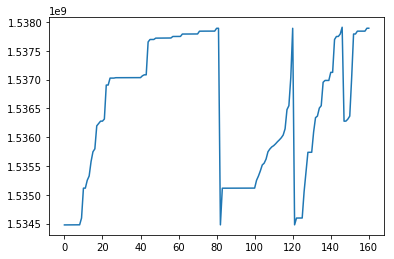

In [3]:
plt.figure()
plt.plot(data.index,data['Time Stamp'])

### Analysing Overall Stats

In [103]:
September14_start = 1536883200
September16_end = 1537142399

Remove results of 14-16 September

In [104]:
to_drop = []
for i in range(0,len(data['Time Stamp'])):
    if data['Time Stamp'][i] >= September14_start and data['Time Stamp'][i] <= September16_end:
        to_drop.append(i)
Dropped = data.drop(to_drop)

In [105]:
Dropped.describe()

,Time Stamp,Anomaly
count,1.310000e+02,131.000000
mean,1.536382e+09,0.687023
std,1.268129e+06,0.465485
min,1.534476e+09,0.000000
25%,1.535115e+09,0.000000
50%,1.536278e+09,1.000000
75%,1.537751e+09,1.000000
max,1.537911e+09,1.000000


In [106]:
sum(data['Anomaly'])

90

### Analysing the 3D LoF Model

In [8]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #For 3D Plots

#Required by Jupyter for inlining images
%matplotlib inline

In [10]:
data = pd.read_csv('../Data/B1_output.txt',sep='\t', header=None)
data.columns = ['Time Stamp','Date Time','Anomaly']

In [11]:
_3DLoF = pd.read_pickle('../Data/Anomalies_from_3D_LoF.pkl')
_3DLoF.describe()

,Time Stamp Abort Gap,Abort Gap Reading,Time Stamp SPS,Time Stamp LHC,LHC-SPS,Time Stamp BLM,BLM,Time Stamp BPM,BPM Reading 1,BPM Reading 2,...,BPM Reading 16,BPM Reading 17,BPM Reading 18,BPM MSE,Time Stamp Bunches,Number of Bunches,Change in Number of Bunches,normBLM,normLHC-SPS,normAbort Gap Reading
count,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,82.000000,8.200000e+01,82.000000,82.000000,...,82.000000,82.000000,82.000000,82.000000,8.200000e+01,82.000000,82.000000,82.000000,8.200000e+01,8.200000e+01
mean,1.536881e+09,-8.568142e+07,1.536881e+09,1.536881e+09,-1.081817e+11,1.536881e+09,0.007977,1.536881e+09,0.114976,0.819756,...,-1.337183,-0.492768,-0.487537,0.179281,1.536881e+09,763.487805,70.963415,0.000169,-9.033138e+07,-2.609126e+08
std,1.142763e+06,2.222107e+09,1.142761e+06,1.142760e+06,2.262841e+11,1.142761e+06,0.012195,1.142761e+06,0.225568,0.374277,...,0.151561,0.111512,0.206518,0.098320,1.142761e+06,894.321168,61.308458,0.000175,5.045803e+09,1.982101e+09
min,1.534476e+09,-1.781034e+10,1.534476e+09,1.534476e+09,-1.130185e+12,1.534476e+09,0.000070,1.534476e+09,-0.631000,-0.134000,...,-1.670000,-0.722000,-0.944000,0.005628,1.534476e+09,2.000000,1.000000,0.000027,-1.967973e+10,-1.781034e+10
25%,1.536288e+09,-4.190083e+08,1.536288e+09,1.536288e+09,-6.382593e+10,1.536288e+09,0.000557,1.536288e+09,-0.053250,0.644000,...,-1.458500,-0.553500,-0.677000,0.109093,1.536288e+09,17.500000,1.250000,0.000050,-1.517336e+09,-1.117569e+07
50%,1.537051e+09,1.214944e+08,1.537051e+09,1.537051e+09,-5.461467e+09,1.537051e+09,0.003074,1.537051e+09,0.077500,0.930500,...,-1.277500,-0.480000,-0.416000,0.192561,1.537051e+09,295.000000,48.000000,0.000085,-1.670124e+08,1.869585e+06
75%,1.537751e+09,4.782854e+08,1.537751e+09,1.537751e+09,5.441265e+09,1.537751e+09,0.009425,1.537751e+09,0.296000,1.061500,...,-1.228250,-0.436000,-0.340000,0.246847,1.537751e+09,1287.750000,144.000000,0.000244,1.650130e+08,1.092849e+07
max,1.537893e+09,3.467074e+09,1.537893e+09,1.537893e+09,2.136241e+10,1.537893e+09,0.058731,1.537893e+09,0.502000,1.550000,...,-1.044000,-0.141000,0.018000,0.507211,1.537893e+09,2556.000000,144.000000,0.001087,1.573919e+10,6.491628e+08


In [12]:
Results = data[:82]

In [13]:
Results = Results.set_index(_3DLoF.index)

In [14]:
_3DLoF['Actual'] = Results['Anomaly']

In [15]:
September14_start = 1536883200
September16_end = 1537142399

Remove results of 14-16 September

In [16]:
to_drop = []
for i in _3DLoF.index:
    if _3DLoF['Time Stamp LHC'][i] >= September14_start and _3DLoF['Time Stamp LHC'][i] <= September16_end:
        to_drop.append(i)
_3DLoF = _3DLoF.drop(to_drop)

In [17]:
OG_Data = pd.read_pickle('../Data/Beam1_data.pkl')

In [18]:
OG_Data['is_outlier'] = _3DLoF['Actual']
OG_Data = OG_Data.replace(np.nan,-1)

In [19]:
OG_Data = OG_Data.drop(to_drop)

In [20]:
is_anomaly = OG_Data['is_outlier']==1
Anomalies = OG_Data[is_anomaly]

normal = OG_Data['is_outlier']==-1
Inliers = OG_Data[normal]

badly_detected = OG_Data['is_outlier']==0
Bads = OG_Data[badly_detected]

In [21]:
len(Bads)

21

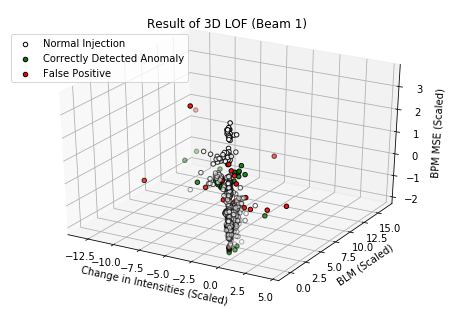

In [22]:
fig = plt.figure()
ax = Axes3D(fig)
correct = ax.scatter(Anomalies['Change in Intensities'],Anomalies['BLM'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = ax.scatter(Inliers['Change in Intensities'],Inliers['BLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = ax.scatter(Bads['Change in Intensities'],Bads['BLM'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
ax.set_xlabel('Change in Intensities (Scaled)')
ax.set_ylabel('BLM (Scaled)')
ax.set_zlabel('BPM MSE (Scaled)')
ax.set_title('Result of 3D LOF (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'), loc=(0,0.75))
plt.savefig('../Dissertation/images/3D_LOF_Results', bbox_inches='tight')
plt.show()

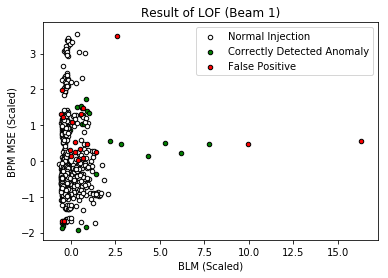

In [23]:
plt.figure()
correct = plt.scatter(Anomalies['BLM'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = plt.scatter(Inliers['BLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = plt.scatter(Bads['BLM'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
plt.xlabel('BLM (Scaled)')
plt.ylabel('BPM MSE (Scaled)')
plt.title('Result of LOF (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'),loc='best')
plt.savefig('../Dissertation/images/3D_LOF_BLMBPM', bbox_inches='tight')
plt.show()

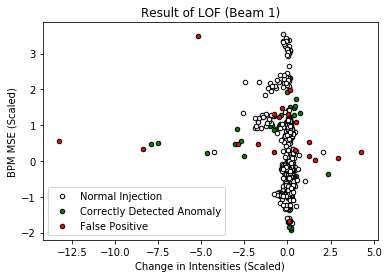

In [24]:
plt.figure()
correct = plt.scatter(Anomalies['Change in Intensities'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = plt.scatter(Inliers['Change in Intensities'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = plt.scatter(Bads['Change in Intensities'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
plt.xlabel('Change in Intensities (Scaled)')
plt.ylabel('BPM MSE (Scaled)')
plt.title('Result of LOF (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'),loc='best')
plt.savefig('../Dissertation/images/3D_LOF_ResultsBPMIntensity', bbox_inches='tight')
plt.show()

In [25]:
_3DLoF.describe()

,Time Stamp Abort Gap,Abort Gap Reading,Time Stamp SPS,Time Stamp LHC,LHC-SPS,Time Stamp BLM,BLM,Time Stamp BPM,BPM Reading 1,BPM Reading 2,...,BPM Reading 17,BPM Reading 18,BPM MSE,Time Stamp Bunches,Number of Bunches,Change in Number of Bunches,normBLM,normLHC-SPS,normAbort Gap Reading,Actual
count,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,6.000000e+01,60.000000,60.000000,...,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.000000,60.000000,6.000000e+01,6.000000e+01,60.000000
mean,1.536827e+09,-6.049013e+07,1.536827e+09,1.536827e+09,-1.491969e+11,1.536827e+09,0.010695,1.536827e+09,0.145217,0.861417,...,-0.487867,-0.398433,0.197973,1.536827e+09,992.433333,92.666667,0.000161,-1.494350e+09,-3.123555e+08,0.650000
std,1.334630e+06,2.578997e+09,1.334627e+06,1.334627e+06,2.527876e+11,1.334627e+06,0.013268,1.334627e+06,0.248786,0.417395,...,0.126862,0.152911,0.103758,1.334627e+06,931.030455,56.841041,0.000191,3.550934e+09,2.302014e+09,0.480995
min,1.534476e+09,-1.781034e+10,1.534476e+09,1.534476e+09,-1.130185e+12,1.534476e+09,0.000171,1.534476e+09,-0.631000,-0.134000,...,-0.722000,-0.765000,0.005628,1.534476e+09,2.000000,1.000000,0.000027,-1.967973e+10,-1.781034e+10,0.000000
25%,1.535704e+09,-4.085670e+08,1.535704e+09,1.535704e+09,-2.241419e+11,1.535704e+09,0.002700,1.535704e+09,-0.039750,0.723500,...,-0.563000,-0.477250,0.138300,1.535704e+09,120.750000,47.750000,0.000052,-2.542589e+09,-3.872949e+06,0.000000
50%,1.537722e+09,1.837368e+08,1.537722e+09,1.537722e+09,-1.681560e+10,1.537722e+09,0.004874,1.537722e+09,0.130500,1.012500,...,-0.466000,-0.374500,0.234969,1.537722e+09,606.500000,96.000000,0.000083,-3.410780e+08,2.525594e+06,1.000000
75%,1.537793e+09,7.217318e+08,1.537793e+09,1.537793e+09,1.234103e+09,1.537793e+09,0.011958,1.537793e+09,0.399000,1.099250,...,-0.406750,-0.315500,0.254068,1.537793e+09,1980.000000,144.000000,0.000231,3.061035e+07,9.986884e+06,1.000000
max,1.537893e+09,3.467074e+09,1.537893e+09,1.537893e+09,2.136241e+10,1.537893e+09,0.058731,1.537893e+09,0.502000,1.550000,...,-0.141000,0.018000,0.507211,1.537893e+09,2556.000000,144.000000,0.001087,5.627390e+09,3.266406e+08,1.000000


### 3D DBSCAN:

In [26]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #For 3D Plots

#Required by Jupyter for inlining images
%matplotlib inline

In [28]:
data = pd.read_csv('../Data/B1_output.txt',sep='\t', header=None)
data.columns = ['Time Stamp','Date Time','Anomaly']

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 3 columns):
Time Stamp    161 non-null int64
Date Time     161 non-null object
Anomaly       161 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.9+ KB


In [31]:
DBSCAN = pd.read_pickle('../Data/Anomalies_from_3D_DBSCAN.pkl')
DBSCAN.describe()

,Time Stamp Abort Gap,Abort Gap Reading,Time Stamp SPS,Time Stamp LHC,LHC-SPS,Time Stamp BLM,BLM,Time Stamp BPM,BPM Reading 1,BPM Reading 2,...,BPM Reading 16,BPM Reading 17,BPM Reading 18,BPM MSE,Time Stamp Bunches,Number of Bunches,Change in Number of Bunches,normBLM,normLHC-SPS,normAbort Gap Reading
count,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,62.000000,6.200000e+01,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,6.200000e+01,62.000000,62.000000,62.000000,6.200000e+01,6.200000e+01
mean,1.537170e+09,1.099572e+07,1.537170e+09,1.537170e+09,-1.207488e+11,1.537170e+09,0.008231,1.537170e+09,0.154532,0.875339,...,-1.356790,-0.501532,-0.510694,0.188285,1.537170e+09,675.403226,57.274194,0.000195,4.752198e+08,-3.423345e+08
std,8.626960e+05,2.568375e+09,8.626942e+05,8.626937e+05,2.109750e+11,8.626942e+05,0.011719,8.626942e+05,0.201209,0.308326,...,0.164142,0.103219,0.212350,0.084322,8.626942e+05,843.587217,60.226395,0.000146,5.390468e+09,2.278942e+09
min,1.534477e+09,-1.781034e+10,1.534477e+09,1.534477e+09,-7.532069e+11,1.534477e+09,0.000070,1.534477e+09,-0.316000,-0.008000,...,-1.670000,-0.722000,-0.915000,0.011799,1.534477e+09,2.000000,1.000000,0.000032,-1.136115e+10,-1.781034e+10
25%,1.537034e+09,-2.778437e+08,1.537034e+09,1.537034e+09,-2.115968e+11,1.537034e+09,0.000293,1.537034e+09,-0.007750,0.671000,...,-1.522750,-0.545750,-0.709000,0.114025,1.537034e+09,13.000000,1.000000,0.000069,-2.643120e+09,-1.893508e+07
50%,1.537084e+09,1.459681e+08,1.537084e+09,1.537084e+09,-2.802503e+09,1.537084e+09,0.002492,1.537084e+09,0.105000,0.966000,...,-1.298000,-0.492500,-0.438000,0.201479,1.537084e+09,168.500000,47.500000,0.000190,-1.672926e+08,3.121080e+06
75%,1.537830e+09,6.314942e+08,1.537830e+09,1.537830e+09,5.726177e+09,1.537830e+09,0.011870,1.537830e+09,0.372000,1.059500,...,-1.226250,-0.460750,-0.343500,0.247305,1.537830e+09,1284.000000,144.000000,0.000273,1.362618e+09,1.860456e+07
max,1.537893e+09,5.232714e+09,1.537893e+09,1.537893e+09,2.136241e+10,1.537893e+09,0.040646,1.537893e+09,0.478000,1.557000,...,-1.063000,-0.185000,0.004000,0.413014,1.537893e+09,2556.000000,144.000000,0.000910,1.573919e+10,6.511521e+08


In [32]:
DBSCAN['Time Stamp (int)'] = DBSCAN['Time Stamp LHC'].apply(round)

In [33]:
to_append = []
for index in DBSCAN.index.values:
    found = 0
    for subindex in data.index.values:
        if data['Time Stamp'][subindex] == DBSCAN['Time Stamp (int)'][index]:
            found = 1
            to_append.append(data['Anomaly'][subindex])
            break
    if found == 0:
        to_append.append(np.nan)
DBSCAN['Actual'] = to_append

In [34]:
DBSCAN.describe()

,Time Stamp Abort Gap,Abort Gap Reading,Time Stamp SPS,Time Stamp LHC,LHC-SPS,Time Stamp BLM,BLM,Time Stamp BPM,BPM Reading 1,BPM Reading 2,...,BPM Reading 18,BPM MSE,Time Stamp Bunches,Number of Bunches,Change in Number of Bunches,normBLM,normLHC-SPS,normAbort Gap Reading,Time Stamp (int),Actual
count,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,62.000000,6.200000e+01,62.000000,62.000000,...,62.000000,62.000000,6.200000e+01,62.000000,62.000000,62.000000,6.200000e+01,6.200000e+01,6.200000e+01,62.000000
mean,1.537170e+09,1.099572e+07,1.537170e+09,1.537170e+09,-1.207488e+11,1.537170e+09,0.008231,1.537170e+09,0.154532,0.875339,...,-0.510694,0.188285,1.537170e+09,675.403226,57.274194,0.000195,4.752198e+08,-3.423345e+08,1.537170e+09,0.370968
std,8.626960e+05,2.568375e+09,8.626942e+05,8.626937e+05,2.109750e+11,8.626942e+05,0.011719,8.626942e+05,0.201209,0.308326,...,0.212350,0.084322,8.626942e+05,843.587217,60.226395,0.000146,5.390468e+09,2.278942e+09,8.626937e+05,0.487007
min,1.534477e+09,-1.781034e+10,1.534477e+09,1.534477e+09,-7.532069e+11,1.534477e+09,0.000070,1.534477e+09,-0.316000,-0.008000,...,-0.915000,0.011799,1.534477e+09,2.000000,1.000000,0.000032,-1.136115e+10,-1.781034e+10,1.534477e+09,0.000000
25%,1.537034e+09,-2.778437e+08,1.537034e+09,1.537034e+09,-2.115968e+11,1.537034e+09,0.000293,1.537034e+09,-0.007750,0.671000,...,-0.709000,0.114025,1.537034e+09,13.000000,1.000000,0.000069,-2.643120e+09,-1.893508e+07,1.537034e+09,0.000000
50%,1.537084e+09,1.459681e+08,1.537084e+09,1.537084e+09,-2.802503e+09,1.537084e+09,0.002492,1.537084e+09,0.105000,0.966000,...,-0.438000,0.201479,1.537084e+09,168.500000,47.500000,0.000190,-1.672926e+08,3.121080e+06,1.537084e+09,0.000000
75%,1.537830e+09,6.314942e+08,1.537830e+09,1.537830e+09,5.726177e+09,1.537830e+09,0.011870,1.537830e+09,0.372000,1.059500,...,-0.343500,0.247305,1.537830e+09,1284.000000,144.000000,0.000273,1.362618e+09,1.860456e+07,1.537830e+09,1.000000
max,1.537893e+09,5.232714e+09,1.537893e+09,1.537893e+09,2.136241e+10,1.537893e+09,0.040646,1.537893e+09,0.478000,1.557000,...,0.004000,0.413014,1.537893e+09,2556.000000,144.000000,0.000910,1.573919e+10,6.511521e+08,1.537893e+09,1.000000


In [35]:
September14_start = 1536883200
September16_end = 1537142399

Remove results of 14-16 September

In [36]:
to_drop = []
for i in DBSCAN.index:
    if DBSCAN['Time Stamp LHC'][i] >= September14_start and DBSCAN['Time Stamp LHC'][i] <= September16_end:
        to_drop.append(i)
DBSCAN = DBSCAN.drop(to_drop)

In [37]:
OG_Data = pd.read_pickle('../Data/Beam1_data.pkl')

In [38]:
OG_Data['is_outlier'] = DBSCAN['Actual']
OG_Data = OG_Data.replace(np.nan,-1)

In [39]:
OG_Data = OG_Data.drop(to_drop)

In [40]:
is_anomaly = OG_Data['is_outlier']==1
Anomalies = OG_Data[is_anomaly]

normal = OG_Data['is_outlier']==-1
Inliers = OG_Data[normal]

badly_detected = OG_Data['is_outlier']==0
Bads = OG_Data[badly_detected]

In [41]:
len(Bads)

17

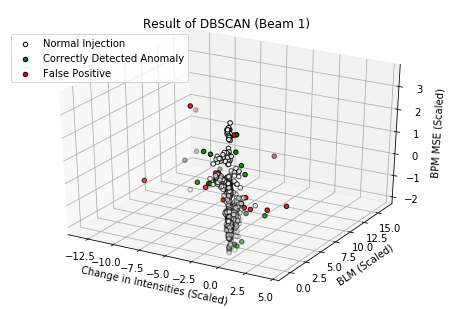

In [42]:
fig = plt.figure()
ax = Axes3D(fig)
correct = ax.scatter(Anomalies['Change in Intensities'],Anomalies['BLM'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = ax.scatter(Inliers['Change in Intensities'],Inliers['BLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = ax.scatter(Bads['Change in Intensities'],Bads['BLM'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
ax.set_xlabel('Change in Intensities (Scaled)')
ax.set_ylabel('BLM (Scaled)')
ax.set_zlabel('BPM MSE (Scaled)')
ax.set_title('Result of DBSCAN (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'), loc=(0,0.75))
plt.savefig('../Dissertation/images/DBSCAN_Results', bbox_inches='tight')
plt.show()

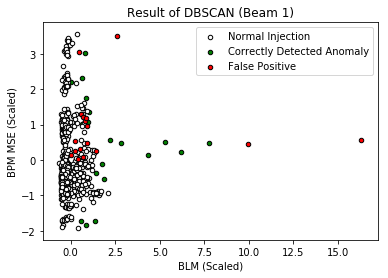

In [43]:
plt.figure()
correct = plt.scatter(Anomalies['BLM'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = plt.scatter(Inliers['BLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = plt.scatter(Bads['BLM'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
plt.xlabel('BLM (Scaled)')
plt.ylabel('BPM MSE (Scaled)')
plt.title('Result of DBSCAN (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'),loc='best')
plt.savefig('../Dissertation/images/DBSCAN_BLMBPM', bbox_inches='tight')
plt.show()

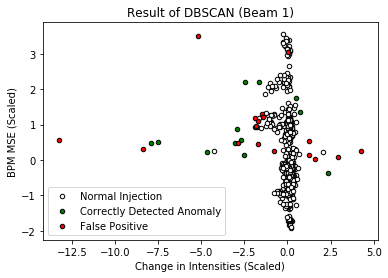

In [44]:
plt.figure()
correct = plt.scatter(Anomalies['Change in Intensities'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = plt.scatter(Inliers['Change in Intensities'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = plt.scatter(Bads['Change in Intensities'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
plt.xlabel('Change in Intensities (Scaled)')
plt.ylabel('BPM MSE (Scaled)')
plt.title('Result of DBSCAN (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'),loc='best')
plt.savefig('../Dissertation/images/DBSCAN_ResultsBPMIntensity', bbox_inches='tight')
plt.show()

In [45]:
DBSCAN.describe()

,Time Stamp Abort Gap,Abort Gap Reading,Time Stamp SPS,Time Stamp LHC,LHC-SPS,Time Stamp BLM,BLM,Time Stamp BPM,BPM Reading 1,BPM Reading 2,...,BPM Reading 18,BPM MSE,Time Stamp Bunches,Number of Bunches,Change in Number of Bunches,normBLM,normLHC-SPS,normAbort Gap Reading,Time Stamp (int),Actual
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,4.000000e+01,40.000000,40.000000,...,40.000000,40.000000,4.000000e+01,40.000000,40.000000,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,40.000000
mean,1.537244e+09,1.004547e+08,1.537244e+09,1.537244e+09,-1.894229e+11,1.537244e+09,0.012481,1.537244e+09,0.220100,0.961775,...,-0.386375,0.220119,1.537244e+09,974.100000,83.475000,0.000191,-1.608016e+09,-4.633314e+08,1.537244e+09,0.575000
std,1.071130e+06,3.176745e+09,1.071128e+06,1.071127e+06,2.365491e+11,1.071128e+06,0.012744,1.071128e+06,0.209825,0.332913,...,0.137384,0.080684,1.071128e+06,897.527453,59.199354,0.000159,2.960283e+09,2.817896e+09,1.071127e+06,0.500641
min,1.534477e+09,-1.781034e+10,1.534477e+09,1.534477e+09,-7.532069e+11,1.534477e+09,0.000194,1.534477e+09,-0.316000,-0.008000,...,-0.739000,0.011799,1.534477e+09,2.000000,1.000000,0.000037,-1.136115e+10,-1.781034e+10,1.534477e+09,0.000000
25%,1.537378e+09,-9.800587e+07,1.537378e+09,1.537378e+09,-3.961722e+11,1.537378e+09,0.002672,1.537378e+09,0.021750,0.955500,...,-0.406250,0.181860,1.537378e+09,109.000000,12.750000,0.000066,-3.162210e+09,-7.382182e+05,1.537378e+09,0.000000
50%,1.537750e+09,3.337916e+08,1.537750e+09,1.537750e+09,-2.528047e+10,1.537750e+09,0.005413,1.537750e+09,0.314000,1.045500,...,-0.356000,0.237267,1.537750e+09,715.500000,96.000000,0.000166,-8.340485e+08,4.522283e+06,1.537750e+09,1.000000
75%,1.537843e+09,9.249545e+08,1.537843e+09,1.537843e+09,9.122011e+08,1.537843e+09,0.021253,1.537843e+09,0.399250,1.090250,...,-0.324750,0.259021,1.537843e+09,1740.000000,144.000000,0.000269,2.493517e+07,1.338645e+07,1.537843e+09,1.000000
max,1.537893e+09,5.232714e+09,1.537893e+09,1.537893e+09,2.136241e+10,1.537893e+09,0.040646,1.537893e+09,0.478000,1.557000,...,0.004000,0.413014,1.537893e+09,2556.000000,144.000000,0.000910,5.627390e+09,2.190444e+08,1.537893e+09,1.000000


### Full Model

In [46]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #For 3D Plots

#Required by Jupyter for inlining images
%matplotlib inline

In [48]:
data = pd.read_csv('../Data/B1_output.txt',sep='\t', header=None)
data.columns = ['Time Stamp','Date Time','Anomaly']

In [49]:
Full = pd.read_pickle('../Data/Anomalies_from_Full_LoF.pkl')
Full.describe()

,Time Stamp Abort Gap,Abort Gap Reading,Time Stamp SPS,Time Stamp LHC,LHC-SPS,Time Stamp BLM,BLM,Time Stamp BPM,BPM Reading 1,BPM Reading 2,...,BPM Reading 16,BPM Reading 17,BPM Reading 18,BPM MSE,Time Stamp Bunches,Number of Bunches,Change in Number of Bunches,normBLM,normLHC-SPS,normAbort Gap Reading
count,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,81.000000,8.100000e+01,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000,8.100000e+01,8.100000e+01
mean,1.536253e+09,-1.292081e+08,1.536253e+09,1.536253e+09,-1.108160e+11,1.536253e+09,0.018403,1.536253e+09,0.026457,0.714778,...,-1.313864,-0.534642,-0.424086,0.139904,1.536253e+09,1195.913580,90.580247,0.000214,-4.244902e+08,-2.676168e+08
std,1.090426e+06,3.661255e+09,1.090425e+06,1.090425e+06,1.612550e+11,1.090425e+06,0.021298,1.090425e+06,0.183823,0.301243,...,0.132504,0.122636,0.222219,0.067803,1.090425e+06,1041.459303,62.756447,0.000159,4.373887e+09,1.995621e+09
min,1.534476e+09,-2.100072e+10,1.534476e+09,1.534476e+09,-7.532069e+11,1.534476e+09,0.000070,1.534476e+09,-0.316000,-0.037000,...,-1.670000,-0.776000,-0.944000,0.005628,1.534476e+09,2.000000,1.000000,0.000029,-2.200717e+10,-1.781034e+10
25%,1.535115e+09,-2.748561e+08,1.535115e+09,1.535115e+09,-1.730993e+11,1.535115e+09,0.001732,1.535115e+09,-0.119000,0.463000,...,-1.363000,-0.662000,-0.572000,0.089516,1.535115e+09,72.000000,12.000000,0.000081,-1.510271e+09,-5.406157e+06
50%,1.535990e+09,3.465577e+08,1.535990e+09,1.535990e+09,-6.410712e+10,1.535990e+09,0.011349,1.535990e+09,0.008000,0.701000,...,-1.259000,-0.523000,-0.366000,0.114511,1.535990e+09,924.000000,144.000000,0.000186,-5.797119e+08,3.260414e+06
75%,1.537035e+09,8.547301e+08,1.537035e+09,1.537035e+09,2.214293e+09,1.537035e+09,0.027866,1.537035e+09,0.117000,0.992000,...,-1.231000,-0.460000,-0.278000,0.181268,1.537035e+09,2412.000000,144.000000,0.000350,1.246675e+08,1.003204e+07
max,1.537892e+09,5.738175e+09,1.537892e+09,1.537892e+09,2.136241e+10,1.537892e+09,0.072525,1.537892e+09,0.436000,1.218000,...,-1.057000,-0.243000,0.116000,0.292116,1.537892e+09,2556.000000,144.000000,0.000910,1.263421e+10,6.511521e+08


In [50]:
Full['Time Stamp (int)'] = Full['Time Stamp LHC'].apply(round)

In [51]:
to_append = []
for index in Full.index.values:
    found = 0
    for subindex in data.index.values:
        if data['Time Stamp'][subindex] == Full['Time Stamp (int)'][index]:
            found = 1
            to_append.append(data['Anomaly'][subindex])
            break
    if found == 0:
        to_append.append(np.nan)
Full['Actual'] = to_append

In [52]:
Full.describe()

,Time Stamp Abort Gap,Abort Gap Reading,Time Stamp SPS,Time Stamp LHC,LHC-SPS,Time Stamp BLM,BLM,Time Stamp BPM,BPM Reading 1,BPM Reading 2,...,BPM Reading 18,BPM MSE,Time Stamp Bunches,Number of Bunches,Change in Number of Bunches,normBLM,normLHC-SPS,normAbort Gap Reading,Time Stamp (int),Actual
count,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,81.000000,8.100000e+01,81.000000,81.000000,...,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000,8.100000e+01,8.100000e+01,8.100000e+01,81.000000
mean,1.536253e+09,-1.292081e+08,1.536253e+09,1.536253e+09,-1.108160e+11,1.536253e+09,0.018403,1.536253e+09,0.026457,0.714778,...,-0.424086,0.139904,1.536253e+09,1195.913580,90.580247,0.000214,-4.244902e+08,-2.676168e+08,1.536253e+09,0.567901
std,1.090426e+06,3.661255e+09,1.090425e+06,1.090425e+06,1.612550e+11,1.090425e+06,0.021298,1.090425e+06,0.183823,0.301243,...,0.222219,0.067803,1.090425e+06,1041.459303,62.756447,0.000159,4.373887e+09,1.995621e+09,1.090425e+06,0.498454
min,1.534476e+09,-2.100072e+10,1.534476e+09,1.534476e+09,-7.532069e+11,1.534476e+09,0.000070,1.534476e+09,-0.316000,-0.037000,...,-0.944000,0.005628,1.534476e+09,2.000000,1.000000,0.000029,-2.200717e+10,-1.781034e+10,1.534476e+09,0.000000
25%,1.535115e+09,-2.748561e+08,1.535115e+09,1.535115e+09,-1.730993e+11,1.535115e+09,0.001732,1.535115e+09,-0.119000,0.463000,...,-0.572000,0.089516,1.535115e+09,72.000000,12.000000,0.000081,-1.510271e+09,-5.406157e+06,1.535115e+09,0.000000
50%,1.535990e+09,3.465577e+08,1.535990e+09,1.535990e+09,-6.410712e+10,1.535990e+09,0.011349,1.535990e+09,0.008000,0.701000,...,-0.366000,0.114511,1.535990e+09,924.000000,144.000000,0.000186,-5.797119e+08,3.260414e+06,1.535990e+09,1.000000
75%,1.537035e+09,8.547301e+08,1.537035e+09,1.537035e+09,2.214293e+09,1.537035e+09,0.027866,1.537035e+09,0.117000,0.992000,...,-0.278000,0.181268,1.537035e+09,2412.000000,144.000000,0.000350,1.246675e+08,1.003204e+07,1.537035e+09,1.000000
max,1.537892e+09,5.738175e+09,1.537892e+09,1.537892e+09,2.136241e+10,1.537892e+09,0.072525,1.537892e+09,0.436000,1.218000,...,0.116000,0.292116,1.537892e+09,2556.000000,144.000000,0.000910,1.263421e+10,6.511521e+08,1.537892e+09,1.000000


In [53]:
September14_start = 1536883200
September16_end = 1537142399

Remove results of 14-16 September

In [54]:
to_drop = []
for i in Full.index:
    if Full['Time Stamp LHC'][i] >= September14_start and Full['Time Stamp LHC'][i] <= September16_end:
        to_drop.append(i)
Full = Full.drop(to_drop)

In [55]:
OG_Data = pd.read_pickle('../Data/Beam1_FullData.pkl')

In [56]:
OG_Data['is_outlier'] = Full['Actual']
OG_Data = OG_Data.replace(np.nan,-1)

In [57]:
OG_Data = OG_Data.drop(to_drop)

In [58]:
is_anomaly = OG_Data['is_outlier']==1
Anomalies = OG_Data[is_anomaly]

normal = OG_Data['is_outlier']==-1
Inliers = OG_Data[normal]

badly_detected = OG_Data['is_outlier']==0
Bads = OG_Data[badly_detected]

In [59]:
len(Bads)

18

In [60]:
Anomalies.describe()

,normAbort Gap Reading,normLHC-SPS,normBLM,BPM Reading 1,BPM Reading 2,BPM Reading 3,BPM Reading 4,BPM Reading 5,BPM Reading 6,BPM Reading 7,...,BPM Reading 12,BPM Reading 13,BPM Reading 14,BPM Reading 15,BPM Reading 16,BPM Reading 17,BPM Reading 18,Change in Number of Bunches,BPM MSE,is_outlier
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,-0.506665,-0.746729,1.382012,-0.951270,-0.635174,-0.883005,-0.349253,-0.680078,0.012632,-0.499857,...,0.093676,0.220158,-0.914890,-1.149317,-0.589764,-1.005085,-0.051272,-0.993594,-0.430630,1.0
std,1.501852,1.787653,1.627923,1.026632,0.994363,0.916240,0.983155,0.968936,0.847900,0.961188,...,0.841378,1.060618,1.464584,1.143974,1.245839,1.179659,1.022595,1.364637,0.929617,0.0
min,-8.973301,-7.887593,-0.516813,-2.139954,-2.621847,-3.535167,-2.295454,-3.603144,-1.204474,-3.342260,...,-1.696970,-2.858858,-4.757923,-3.814069,-3.510294,-4.064821,-2.256470,-2.374645,-1.915980,1.0
25%,-1.096625,-0.505057,0.365126,-1.773539,-1.300427,-1.150211,-1.016323,-0.995619,-0.470367,-0.807426,...,-0.440748,-0.242150,-1.202078,-1.678173,-1.036814,-1.695286,-0.655903,-2.121628,-0.935435,1.0
50%,0.094718,-0.334110,1.244279,-1.349349,-0.974206,-0.883261,-0.781428,-0.496051,-0.394952,-0.123168,...,0.238454,0.589217,-0.139894,-1.306268,0.049759,-1.457908,0.295587,-2.121628,-0.845628,1.0
75%,0.105658,0.186472,1.559130,-0.444715,0.036027,-0.550794,0.463981,-0.286209,0.331518,0.048996,...,0.380304,0.791600,0.059980,-0.506160,0.215797,-0.078152,0.679133,0.640474,0.105719,1.0
max,1.694560,0.467268,7.769989,1.721845,1.599483,1.870341,1.532638,2.014899,1.888513,1.317145,...,2.087324,3.247912,0.313153,1.447195,1.089939,1.988304,2.151360,0.640474,3.550598,1.0


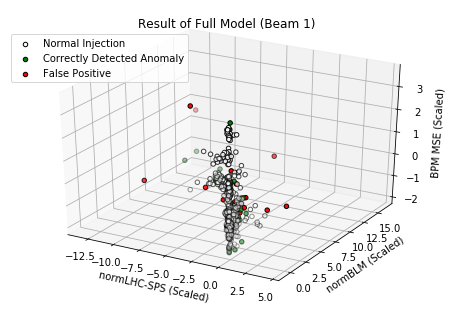

In [61]:
fig = plt.figure()
ax = Axes3D(fig)
correct = ax.scatter(Anomalies['normLHC-SPS'],Anomalies['normBLM'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = ax.scatter(Inliers['normLHC-SPS'],Inliers['normBLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = ax.scatter(Bads['normLHC-SPS'],Bads['normBLM'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
ax.set_xlabel('normLHC-SPS (Scaled)')
ax.set_ylabel('normBLM (Scaled)')
ax.set_zlabel('BPM MSE (Scaled)')
ax.set_title('Result of Full Model (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'), loc=(0,0.75))
plt.savefig('../Dissertation/images/Full_Results', bbox_inches='tight')
plt.show()

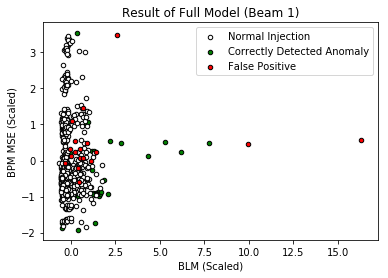

In [63]:
plt.figure()
correct = plt.scatter(Anomalies['normBLM'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = plt.scatter(Inliers['normBLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = plt.scatter(Bads['normBLM'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
plt.xlabel('BLM (Scaled)')
plt.ylabel('BPM MSE (Scaled)')
plt.title('Result of Full Model (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'),loc='best')
plt.savefig('../Dissertation/images/Full_BLMBPM', bbox_inches='tight')
plt.show()

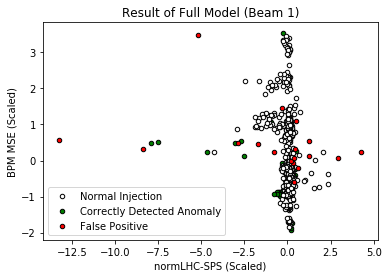

In [64]:
plt.figure()
correct = plt.scatter(Anomalies['normLHC-SPS'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = plt.scatter(Inliers['normLHC-SPS'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = plt.scatter(Bads['normLHC-SPS'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
plt.xlabel('normLHC-SPS (Scaled)')
plt.ylabel('BPM MSE (Scaled)')
plt.title('Result of Full Model (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'),loc='best')
plt.savefig('../Dissertation/images/Full_ResultsBPMIntensity', bbox_inches='tight')
plt.show()

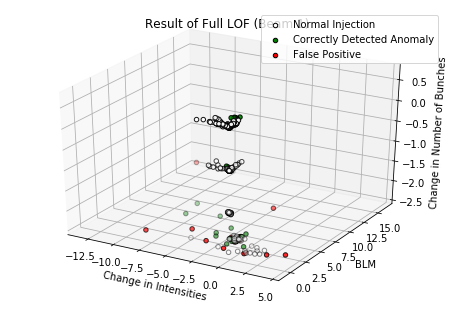

In [66]:
fig = plt.figure()
ax = Axes3D(fig)
correct = ax.scatter(Anomalies['normLHC-SPS'],Anomalies['normBLM'],Anomalies['Change in Number of Bunches'],c='green',
                edgecolor='k', s=20)
normal = ax.scatter(Inliers['normLHC-SPS'],Inliers['normBLM'],Inliers['Change in Number of Bunches'],c='white',
                edgecolor='k', s=20)
incorrect = ax.scatter(Bads['normLHC-SPS'],Bads['normBLM'],Bads['Change in Number of Bunches'],c='red',
                edgecolor='k', s=20)
ax.set_xlabel('Change in Intensities')
ax.set_ylabel('BLM')
ax.set_zlabel('Change in Number of Bunches')
ax.set_title('Result of Full LOF (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'),loc='best')
plt.savefig('../Dissertation/images/Full_Results2', bbox_inches='tight')
plt.show()

In [67]:
Full.describe()

,Time Stamp Abort Gap,Abort Gap Reading,Time Stamp SPS,Time Stamp LHC,LHC-SPS,Time Stamp BLM,BLM,Time Stamp BPM,BPM Reading 1,BPM Reading 2,...,BPM Reading 18,BPM MSE,Time Stamp Bunches,Number of Bunches,Change in Number of Bunches,normBLM,normLHC-SPS,normAbort Gap Reading,Time Stamp (int),Actual
count,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,64.000000,6.400000e+01,64.000000,64.000000,...,64.000000,64.000000,6.400000e+01,64.000000,64.000000,64.000000,6.400000e+01,6.400000e+01,6.400000e+01,64.000000
mean,1.536046e+09,-1.534673e+08,1.536046e+09,1.536046e+09,-1.408610e+11,1.536046e+09,0.023135,1.536046e+09,0.016500,0.708844,...,-0.342562,0.140725,1.536046e+09,1468.750000,111.421875,0.000217,-1.274883e+09,-3.259259e+08,1.536046e+09,0.718750
std,1.140857e+06,4.117989e+09,1.140856e+06,1.140856e+06,1.692227e+11,1.140856e+06,0.021622,1.140856e+06,0.198821,0.325744,...,0.162835,0.069632,1.140856e+06,993.908766,52.836316,0.000164,3.220961e+09,2.233646e+09,1.140856e+06,0.453163
min,1.534476e+09,-2.100072e+10,1.534476e+09,1.534476e+09,-7.532069e+11,1.534476e+09,0.000194,1.534476e+09,-0.316000,-0.037000,...,-0.739000,0.005628,1.534476e+09,2.000000,1.000000,0.000029,-2.200717e+10,-1.781034e+10,1.534476e+09,0.000000
25%,1.535115e+09,-2.747761e+08,1.535115e+09,1.535115e+09,-2.015084e+11,1.535115e+09,0.004619,1.535115e+09,-0.145250,0.429750,...,-0.419000,0.087508,1.535115e+09,414.750000,96.000000,0.000082,-1.562691e+09,-2.267921e+06,1.535115e+09,0.000000
50%,1.535747e+09,3.751028e+08,1.535747e+09,1.535747e+09,-8.949164e+10,1.535747e+09,0.012309,1.535747e+09,-0.006000,0.750500,...,-0.301000,0.132502,1.535747e+09,1884.000000,144.000000,0.000175,-6.426105e+08,4.178837e+06,1.535747e+09,1.000000
75%,1.537666e+09,1.122878e+09,1.537666e+09,1.537666e+09,-2.084854e+10,1.537666e+09,0.039411,1.537666e+09,0.102000,0.997500,...,-0.244500,0.187912,1.537666e+09,2412.000000,144.000000,0.000356,-3.573323e+08,9.286544e+06,1.537666e+09,1.000000
max,1.537892e+09,5.738175e+09,1.537892e+09,1.537892e+09,2.136241e+10,1.537892e+09,0.072525,1.537892e+09,0.436000,1.218000,...,0.116000,0.271702,1.537892e+09,2556.000000,144.000000,0.000910,5.627390e+09,7.122751e+07,1.537892e+09,1.000000


### PCA LoF

In [68]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #For 3D Plots

#Required by Jupyter for inlining images
%matplotlib inline

In [70]:
data = pd.read_csv('../Data/B1_output.txt',sep='\t', header=None)
data.columns = ['Time Stamp','Date Time','Anomaly']

In [71]:
PCA = pd.read_pickle('../Data/Anomalies_from_PCA_LoF.pkl')
PCA.describe()

,Time Stamp Abort Gap,Abort Gap Reading,Time Stamp SPS,Time Stamp LHC,LHC-SPS,Time Stamp BLM,BLM,Time Stamp BPM,BPM Reading 1,BPM Reading 2,...,BPM Reading 16,BPM Reading 17,BPM Reading 18,BPM MSE,Time Stamp Bunches,Number of Bunches,Change in Number of Bunches,normBLM,normLHC-SPS,normAbort Gap Reading
count,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,81.000000,8.100000e+01,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000,8.100000e+01,8.100000e+01
mean,1.536428e+09,-2.946419e+08,1.536428e+09,1.536428e+09,-6.039375e+10,1.536428e+09,0.009916,1.536428e+09,0.059469,0.817642,...,-1.289148,-0.510852,-0.411284,0.170608,1.536428e+09,1112.333333,87.395062,0.000180,-7.029073e+08,-2.670032e+08
std,1.131502e+06,3.935753e+09,1.131500e+06,1.131500e+06,1.139225e+11,1.131501e+06,0.010965,1.131500e+06,0.183648,0.338968,...,0.111226,0.129792,0.199914,0.091090,1.131500e+06,1067.075489,61.684212,0.000279,3.254270e+09,1.993544e+09
min,1.534476e+09,-2.481526e+10,1.534476e+09,1.534476e+09,-6.685251e+11,1.534476e+09,0.000070,1.534476e+09,-0.631000,-0.134000,...,-1.582000,-0.787000,-0.944000,0.005628,1.534476e+09,2.000000,1.000000,0.000031,-1.967973e+10,-1.781034e+10
25%,1.535737e+09,-2.889211e+08,1.535737e+09,1.535737e+09,-8.476857e+10,1.535737e+09,0.002650,1.535737e+09,-0.045000,0.672000,...,-1.326000,-0.599000,-0.503000,0.101437,1.535737e+09,120.000000,13.000000,0.000066,-7.229851e+08,-2.296000e+06
50%,1.536367e+09,2.849100e+08,1.536367e+09,1.536367e+09,-1.967973e+10,1.536367e+09,0.007357,1.536367e+09,0.050000,0.934000,...,-1.270000,-0.492000,-0.390000,0.170088,1.536367e+09,555.000000,144.000000,0.000085,-4.440050e+08,4.540812e+06
75%,1.537721e+09,8.249290e+08,1.537721e+09,1.537721e+09,1.146801e+09,1.537721e+09,0.012296,1.537721e+09,0.135000,1.031000,...,-1.239000,-0.428000,-0.295000,0.237007,1.537721e+09,2412.000000,144.000000,0.000204,2.389169e+07,1.059590e+07
max,1.537911e+09,5.623982e+09,1.537911e+09,1.537911e+09,2.276755e+10,1.537911e+09,0.055561,1.537911e+09,0.531000,1.521000,...,-1.044000,-0.141000,0.116000,0.507211,1.537911e+09,2556.000000,144.000000,0.002137,1.263421e+10,6.511521e+08


In [72]:
PCA['Time Stamp (int)'] = PCA['Time Stamp LHC'].apply(round)

In [73]:
to_append = []
for index in PCA.index.values:
    found = 0
    for subindex in data.index.values:
        if data['Time Stamp'][subindex] == PCA['Time Stamp (int)'][index]:
            found = 1
            to_append.append(data['Anomaly'][subindex])
            break
    if found == 0:
        to_append.append(np.nan)
PCA['Actual'] = to_append

In [74]:
PCA.describe()

,Time Stamp Abort Gap,Abort Gap Reading,Time Stamp SPS,Time Stamp LHC,LHC-SPS,Time Stamp BLM,BLM,Time Stamp BPM,BPM Reading 1,BPM Reading 2,...,BPM Reading 18,BPM MSE,Time Stamp Bunches,Number of Bunches,Change in Number of Bunches,normBLM,normLHC-SPS,normAbort Gap Reading,Time Stamp (int),Actual
count,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,81.000000,8.100000e+01,81.000000,81.000000,...,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000,8.100000e+01,8.100000e+01,8.100000e+01,73.000000
mean,1.536428e+09,-2.946419e+08,1.536428e+09,1.536428e+09,-6.039375e+10,1.536428e+09,0.009916,1.536428e+09,0.059469,0.817642,...,-0.411284,0.170608,1.536428e+09,1112.333333,87.395062,0.000180,-7.029073e+08,-2.670032e+08,1.536428e+09,0.589041
std,1.131502e+06,3.935753e+09,1.131500e+06,1.131500e+06,1.139225e+11,1.131501e+06,0.010965,1.131500e+06,0.183648,0.338968,...,0.199914,0.091090,1.131500e+06,1067.075489,61.684212,0.000279,3.254270e+09,1.993544e+09,1.131500e+06,0.495413
min,1.534476e+09,-2.481526e+10,1.534476e+09,1.534476e+09,-6.685251e+11,1.534476e+09,0.000070,1.534476e+09,-0.631000,-0.134000,...,-0.944000,0.005628,1.534476e+09,2.000000,1.000000,0.000031,-1.967973e+10,-1.781034e+10,1.534476e+09,0.000000
25%,1.535737e+09,-2.889211e+08,1.535737e+09,1.535737e+09,-8.476857e+10,1.535737e+09,0.002650,1.535737e+09,-0.045000,0.672000,...,-0.503000,0.101437,1.535737e+09,120.000000,13.000000,0.000066,-7.229851e+08,-2.296000e+06,1.535737e+09,0.000000
50%,1.536367e+09,2.849100e+08,1.536367e+09,1.536367e+09,-1.967973e+10,1.536367e+09,0.007357,1.536367e+09,0.050000,0.934000,...,-0.390000,0.170088,1.536367e+09,555.000000,144.000000,0.000085,-4.440050e+08,4.540812e+06,1.536367e+09,1.000000
75%,1.537721e+09,8.249290e+08,1.537721e+09,1.537721e+09,1.146801e+09,1.537721e+09,0.012296,1.537721e+09,0.135000,1.031000,...,-0.295000,0.237007,1.537721e+09,2412.000000,144.000000,0.000204,2.389169e+07,1.059590e+07,1.537721e+09,1.000000
max,1.537911e+09,5.623982e+09,1.537911e+09,1.537911e+09,2.276755e+10,1.537911e+09,0.055561,1.537911e+09,0.531000,1.521000,...,0.116000,0.507211,1.537911e+09,2556.000000,144.000000,0.002137,1.263421e+10,6.511521e+08,1.537911e+09,1.000000


In [75]:
September14_start = 1536883200
September16_end = 1537142399

Remove results of 14-16 September

In [76]:
to_drop = []
for i in PCA.index:
    if PCA['Time Stamp LHC'][i] >= September14_start and PCA['Time Stamp LHC'][i] <= September16_end:
        to_drop.append(i)
PCA = PCA.drop(to_drop)

In [77]:
OG_Data = pd.read_pickle('../Data/Beam1_FullData.pkl')

In [78]:
OG_Data['is_outlier'] = PCA['Actual']
OG_Data = OG_Data.replace(np.nan,-1)

In [79]:
OG_Data = OG_Data.drop(to_drop)

In [80]:
is_anomaly = OG_Data['is_outlier']==1
Anomalies = OG_Data[is_anomaly]

normal = OG_Data['is_outlier']==-1
Inliers = OG_Data[normal]

badly_detected = OG_Data['is_outlier']==0
Bads = OG_Data[badly_detected]

In [81]:
len(Bads)

20

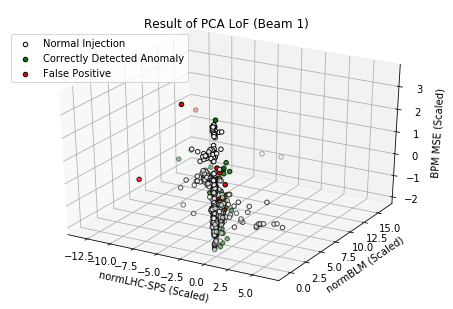

In [84]:
fig = plt.figure()
ax = Axes3D(fig)
correct = ax.scatter(Anomalies['normLHC-SPS'],Anomalies['normBLM'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = ax.scatter(Inliers['normLHC-SPS'],Inliers['normBLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = ax.scatter(Bads['normLHC-SPS'],Bads['normBLM'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
ax.set_xlabel('normLHC-SPS (Scaled)')
ax.set_ylabel('normBLM (Scaled)')
ax.set_zlabel('BPM MSE (Scaled)')
ax.set_title('Result of PCA LoF (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'), loc=(0,0.75))
plt.savefig('../Dissertation/images/PCA_Results', bbox_inches='tight')
plt.show()

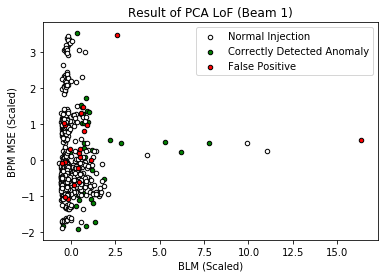

In [85]:
plt.figure()
correct = plt.scatter(Anomalies['normBLM'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = plt.scatter(Inliers['normBLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = plt.scatter(Bads['normBLM'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
plt.xlabel('BLM (Scaled)')
plt.ylabel('BPM MSE (Scaled)')
plt.title('Result of PCA LoF (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'),loc='best')
plt.savefig('../Dissertation/images/PCA_BLMBPM', bbox_inches='tight')
plt.show()

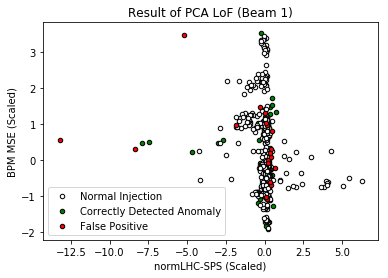

In [88]:
plt.figure()
correct = plt.scatter(Anomalies['normLHC-SPS'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = plt.scatter(Inliers['normLHC-SPS'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = plt.scatter(Bads['normLHC-SPS'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
plt.xlabel('normLHC-SPS (Scaled)')
plt.ylabel('BPM MSE (Scaled)')
plt.title('Result of PCA LoF (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'),loc='best')
plt.savefig('../Dissertation/images/PCA_ResultsBPMIntensity', bbox_inches='tight')
plt.show()

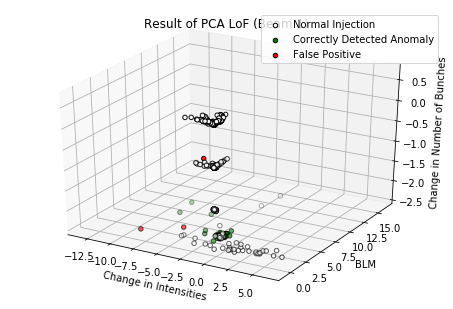

In [89]:
fig = plt.figure()
ax = Axes3D(fig)
correct = ax.scatter(Anomalies['normLHC-SPS'],Anomalies['normBLM'],Anomalies['Change in Number of Bunches'],c='green',
                edgecolor='k', s=20)
normal = ax.scatter(Inliers['normLHC-SPS'],Inliers['normBLM'],Inliers['Change in Number of Bunches'],c='white',
                edgecolor='k', s=20)
incorrect = ax.scatter(Bads['normLHC-SPS'],Bads['normBLM'],Bads['Change in Number of Bunches'],c='red',
                edgecolor='k', s=20)
ax.set_xlabel('Change in Intensities')
ax.set_ylabel('BLM')
ax.set_zlabel('Change in Number of Bunches')
ax.set_title('Result of PCA LoF (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'),loc='best')
plt.savefig('../Dissertation/images/PCA_Results2', bbox_inches='tight')
plt.show()

In [91]:
PCA.describe()

,Time Stamp Abort Gap,Abort Gap Reading,Time Stamp SPS,Time Stamp LHC,LHC-SPS,Time Stamp BLM,BLM,Time Stamp BPM,BPM Reading 1,BPM Reading 2,...,BPM Reading 18,BPM MSE,Time Stamp Bunches,Number of Bunches,Change in Number of Bunches,normBLM,normLHC-SPS,normAbort Gap Reading,Time Stamp (int),Actual
count,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,70.000000,7.000000e+01,70.000000,70.000000,...,70.000000,70.000000,7.000000e+01,70.000000,70.000000,70.000000,7.000000e+01,7.000000e+01,7.000000e+01,63.000000
mean,1.536334e+09,-3.244317e+08,1.536334e+09,1.536334e+09,-6.780115e+10,1.536334e+09,0.010794,1.536334e+09,0.054371,0.819957,...,-0.368529,0.168161,1.536334e+09,1276.528571,95.371429,0.000182,-9.530125e+08,-3.021154e+08,1.536334e+09,0.682540
std,1.190597e+06,4.233410e+09,1.190595e+06,1.190594e+06,1.199203e+11,1.190595e+06,0.010978,1.190595e+06,0.184218,0.354830,...,0.172096,0.092839,1.190595e+06,1057.068173,59.027916,0.000294,2.827551e+09,2.139817e+09,1.190594e+06,0.469227
min,1.534476e+09,-2.481526e+10,1.534476e+09,1.534476e+09,-6.685251e+11,1.534476e+09,0.000194,1.534476e+09,-0.631000,-0.134000,...,-0.765000,0.005628,1.534476e+09,2.000000,1.000000,0.000033,-1.967973e+10,-1.781034e+10,1.534476e+09,0.000000
25%,1.535555e+09,-2.535375e+08,1.535555e+09,1.535555e+09,-8.707718e+10,1.535555e+09,0.003039,1.535555e+09,-0.041250,0.680000,...,-0.471500,0.100532,1.535555e+09,229.000000,47.250000,0.000068,-7.166693e+08,-2.057623e+06,1.535555e+09,0.000000
50%,1.536118e+09,3.632664e+08,1.536118e+09,1.536118e+09,-2.716625e+10,1.536118e+09,0.010838,1.536118e+09,0.038000,0.942500,...,-0.358500,0.155639,1.536118e+09,924.000000,144.000000,0.000085,-4.492304e+08,5.086270e+06,1.536118e+09,1.000000
75%,1.537722e+09,1.020704e+09,1.537722e+09,1.537722e+09,-1.316057e+09,1.537722e+09,0.012340,1.537722e+09,0.130500,1.033250,...,-0.288000,0.235958,1.537722e+09,2412.000000,144.000000,0.000194,-1.927316e+07,1.040882e+07,1.537722e+09,1.000000
max,1.537911e+09,5.623982e+09,1.537911e+09,1.537911e+09,2.136241e+10,1.537911e+09,0.055561,1.537911e+09,0.531000,1.521000,...,0.116000,0.507211,1.537911e+09,2556.000000,144.000000,0.002137,4.882892e+09,3.266406e+08,1.537911e+09,1.000000
